Regressão logística
* método utilizado para prever a clasificação de dados

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [191]:
# carregamento dos dados
df = pd.read_csv('admissao.csv')
df.head()

,Exame1,Exame2,Admitido
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam 2 Score')

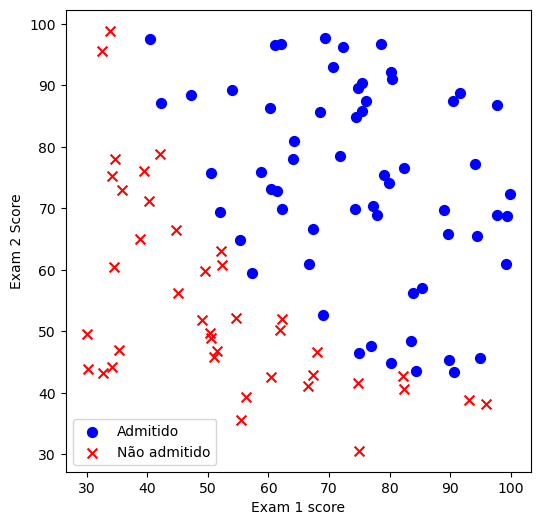

In [192]:
#gráfico ilustrativo de admitidos e não admitidos em relação aos exames1 e exames2
positive = df[df['Admitido'].isin([1])]
negative = df[df['Admitido'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positive['Exame1'], positive['Exame2'], s=50, c="b", marker='o', label='Admitido')
ax.scatter(negative['Exame1'], negative['Exame2'], s=50, c='r', marker='x', label='Não admitido')
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 Score')

In [193]:
#separar features (variáveis) e targets (alvo)
n_features = len(df.columns)-1

X = np.array(df.drop('Admitido',1))
y = df.iloc[:,n_features: n_features+1].values

C:\Users\adils\AppData\Local\Temp\ipykernel_1108\1859576129.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop('Admitido',1))


In [194]:
# média e desvio padrão
mean = X.mean(axis=0)
std = X.std(axis=0)

In [195]:
# padronização dos dados com Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [196]:
scaler.fit(X)
X = scaler.transform(X)

In [197]:
# criando X(0) com valores 1
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X),axis=1)

In [198]:
#  valores iniciais dos pesos W definidos de forma randômica entre 0 e 1
w = np.random.rand(1,n_features+1)
w

array([[0.8255534 , 0.38851222, 0.66650383]])

In [199]:
# função sigmóide para que a regressão possa ser utlizada na classificação
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

In [200]:
''' função binary cross entropy (custo): 1/quantidade de dados 'm' * somatório 'm' vezes de -y log(hipótese) 
menos (1 - y)*log(1-hipóstese)
hipótese = sigmóde * (w(transposta) * X)
'''

def binary_cross_entropy(w,X,y):
    m = len(X)
    parte1 = np.multiply(-y, np.log(sigmoide(X @ w.T)))
    parte2 = np.multiply((1 - y), np.log(1 - sigmoide(X @ w.T)))
    somatório = np.sum(parte1 - parte2)
    return somatório / m

In [201]:
'''algorítimo de gradiente descendente adaptado para regressão logística (inserção sigmóide e função de custo alterada
 para binary cross entropy), ficando a fórmua:
 W(j) = W(j) - alpha * 1/ m * somatório(hipótese - y) * X(j)(i)
 '''
def gradient_descendent(w, X,y,alpha, epoch):
    cost = np.zeros(epoch)
    for i in range (epoch):
        w = w - (alpha / len(X)) * np.sum((sigmoide(X @ w.T) - y) * X, axis=0)
        cost[i] = binary_cross_entropy(w,X,y)
    return w, cost
                 

In [202]:
# treinamento
X = insert_ones(X)
alpha = 0.01 # taxa de aprendizado
epoch = 2000 #quantidade de vezes que o algorítimo será executado
w, cost = gradient_descendent(w, X, y, alpha, epoch)


Text(0.5, 1.0, 'Erro vs Epoch')

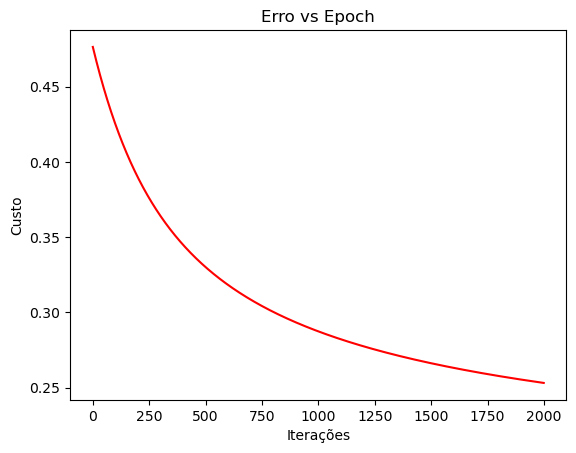

In [204]:
# demonstrativo gráfico:
fig, ax = plt.subplots()
ax.plot(np.arange(epoch), cost, 'r')
ax.set_xlabel('Iterações')
ax.set_ylabel('Custo')
ax.set_title('Erro vs Epoch')

In [211]:
# realizando predição
# def predict(w, X, threshold = 0.5):
#     p = sigmoide(X @ w.T) >= threshold
#     return (p.astype('int'))

def predict(w, X, threshold=0.5):
    p = sigmoide(X@w.T) >= threshold
    p = p.astype('int')
    if p == 1:
        return 'Aprovado'
    else:
        return 'Reprovado'

In [213]:
nota_predict = np.array([[45,85]])
nota_predict = (nota_predict - mean)/ std # padronização dos dados
nota_predict = insert_ones(nota_predict) # preenchimento de X(0)
prob = sigmoide(nota_predict@ w.T)
print('Probabilidade {}'.format(prob))
print('Predição de admissão = {}'.format(predict(w, nota_predict)))



Probabilidade [[0.61899252]]
Predição de admissão = Aprovado


In [215]:
nota_predict2 = np.array([[30,40]])
nota_predict2 = (nota_predict2 - mean)/ std # padronização dos dados
nota_predict2 = insert_ones(nota_predict2) # preenchimento de X(0)
prob = sigmoide(nota_predict2@ w.T)
print('Probabilidade {}'.format(prob))
print('Predição de admissão = {}'.format(predict(w, nota_predict2)))


Probabilidade [[0.00560049]]
Predição de admissão = Reprovado


In [216]:
nota_predict3 = np.array([[89,99]])
nota_predict3 = (nota_predict3 - mean)/ std # padronização dos dados
nota_predict3 = insert_ones(nota_predict3) # preenchimento de X(0)
prob = sigmoide(nota_predict3@ w.T)
print('Probabilidade {}'.format(prob))
print('Predição de admissão = {}'.format(predict(w, nota_predict3)))


Probabilidade [[0.99775667]]
Predição de admissão = Aprovado
